# Proyek Analisis Data: [Bike Sharing Dataset]




*   Nama: [Barry]
*   Email: [m325b4ky0815@bangkit.academy]
*   ID Dicoding: [Barry M325B4KY0815]



# Menentukan Pertanyaan Bisnis



*   Bulan mana yang mencatat jumlah pesanan bike riding tertinggi selama 4 musim?
*   Bulan mana yang mencatat jumlah pesanan bike riding tertinggi dalam 1 tahun?
*   Apa hubungan antara kelembapan dan total pesanan bike riding dalam 1 tahun?


# Packages/Library yang Digunakan


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

# Gathering Data

In [76]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (2).csv
Saving hour.csv to hour (2).csv
Saving Readme.txt to Readme (2).txt


In [77]:
df = pd.read_csv('day.csv')

In [78]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Assessing Data


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [80]:
# Check for duplicate values
df.duplicated().sum()

0

In [81]:
# Check Missing value
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


# Cleaning Data

In [82]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [83]:
# Change the data type

df['dteday'] = pd.to_datetime(df['dteday'])
df['season'] = df.season.astype('category')
df['mnth'] = df.mnth.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['workingday'] = df.workingday.astype('category')
df['weathersit'] = df.weathersit.astype('category')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [85]:
# Converts in a variable category column based on criteria

# convert columns 'season'
df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# convert columns 'yr'
df.yr.replace((0,1), (2011,2012), inplace=True)

# convert columns 'mnth'
df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# convert columns 'weathersit'
df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# convert columns 'weekday'
df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# convert columns 'workingday'
df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

<ipython-input-85-0f9dbb3b5913>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)
<ipython-input-85-0f9dbb3b5913>:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=T

In [86]:
# Drop unused columns
df = df.drop("instant", axis=1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [87]:
# rename columns name
df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

In [88]:
# Change the values ​​of 'temp', 'atemp', 'humidity, 'windspeed' to unnormalized values

df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['humidity'] = df['humidity']*100
df['windspeed'] = df['windspeed']*67

In [89]:
df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Exploratory Data Analysis (EDA)

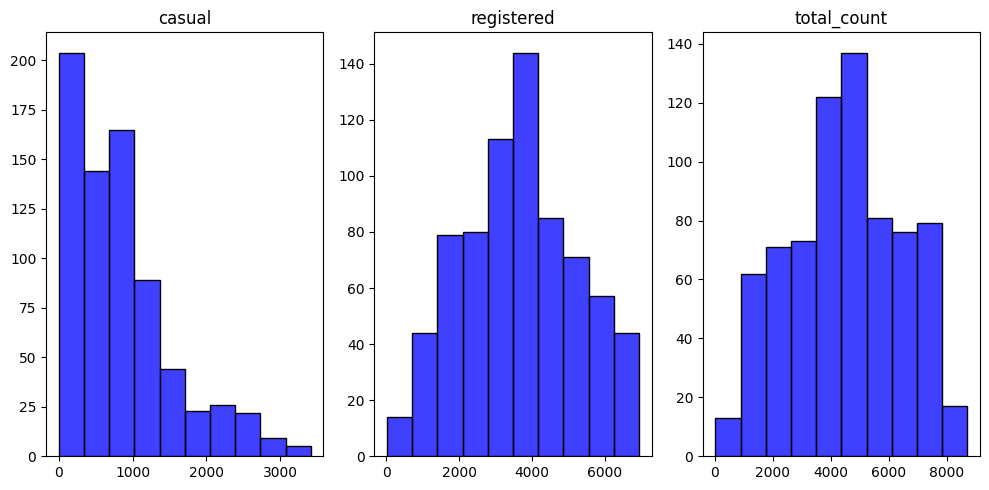

In [90]:
columns = ['casual', 'registered', 'total_count']

fig, ax = plt.subplots(1, 3, figsize=(10,5))

# Creat Histplot
for i, ax in enumerate(ax):
    sns.histplot(x=df[columns[i]], ax=ax, bins=10, color='blue')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


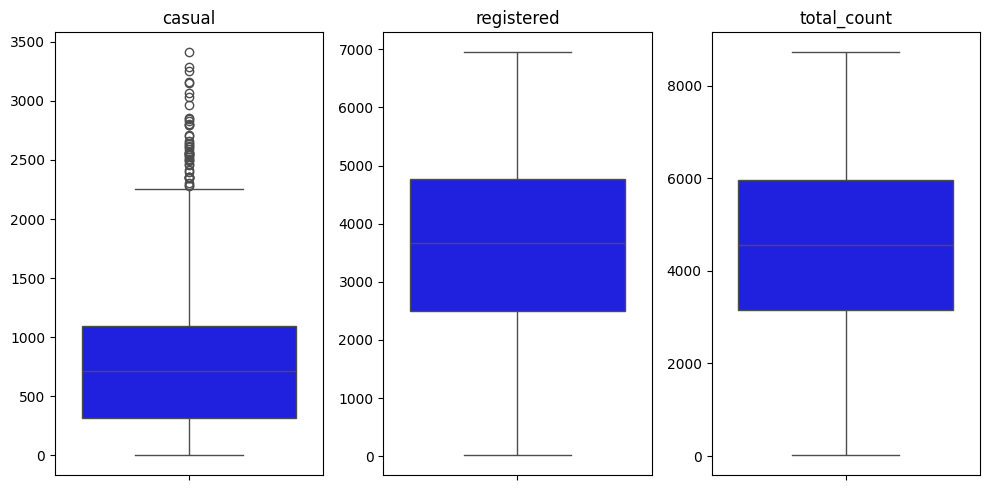

In [91]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))

# Create Boxplot
for i, ax in enumerate(ax):
    sns.boxplot(y=df[columns[i]], ax=ax, color='blue')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

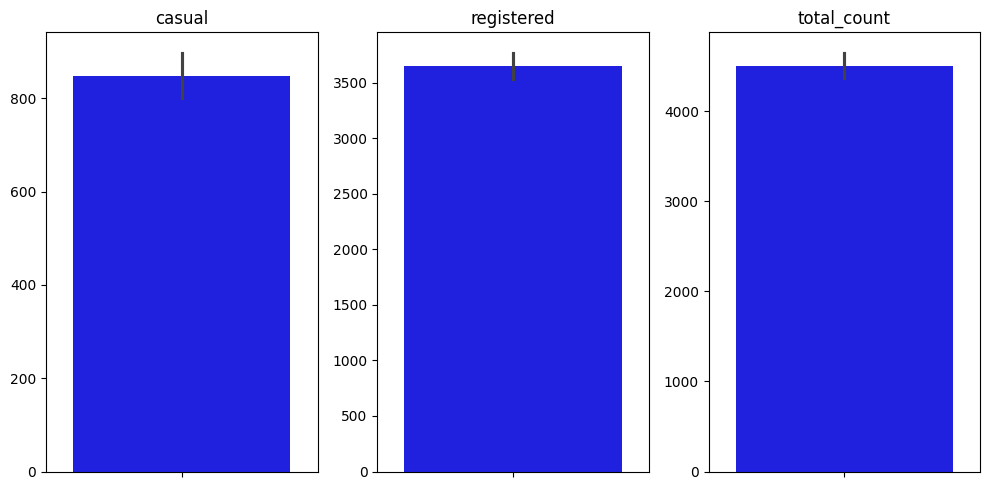

In [92]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))

# Create barplot
for i, ax in enumerate(ax):
    sns.barplot(y=df[columns[i]], ax=ax, color='blue')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

<ipython-input-93-1a6270e3c11f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-93-1a6270e3c11f>:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

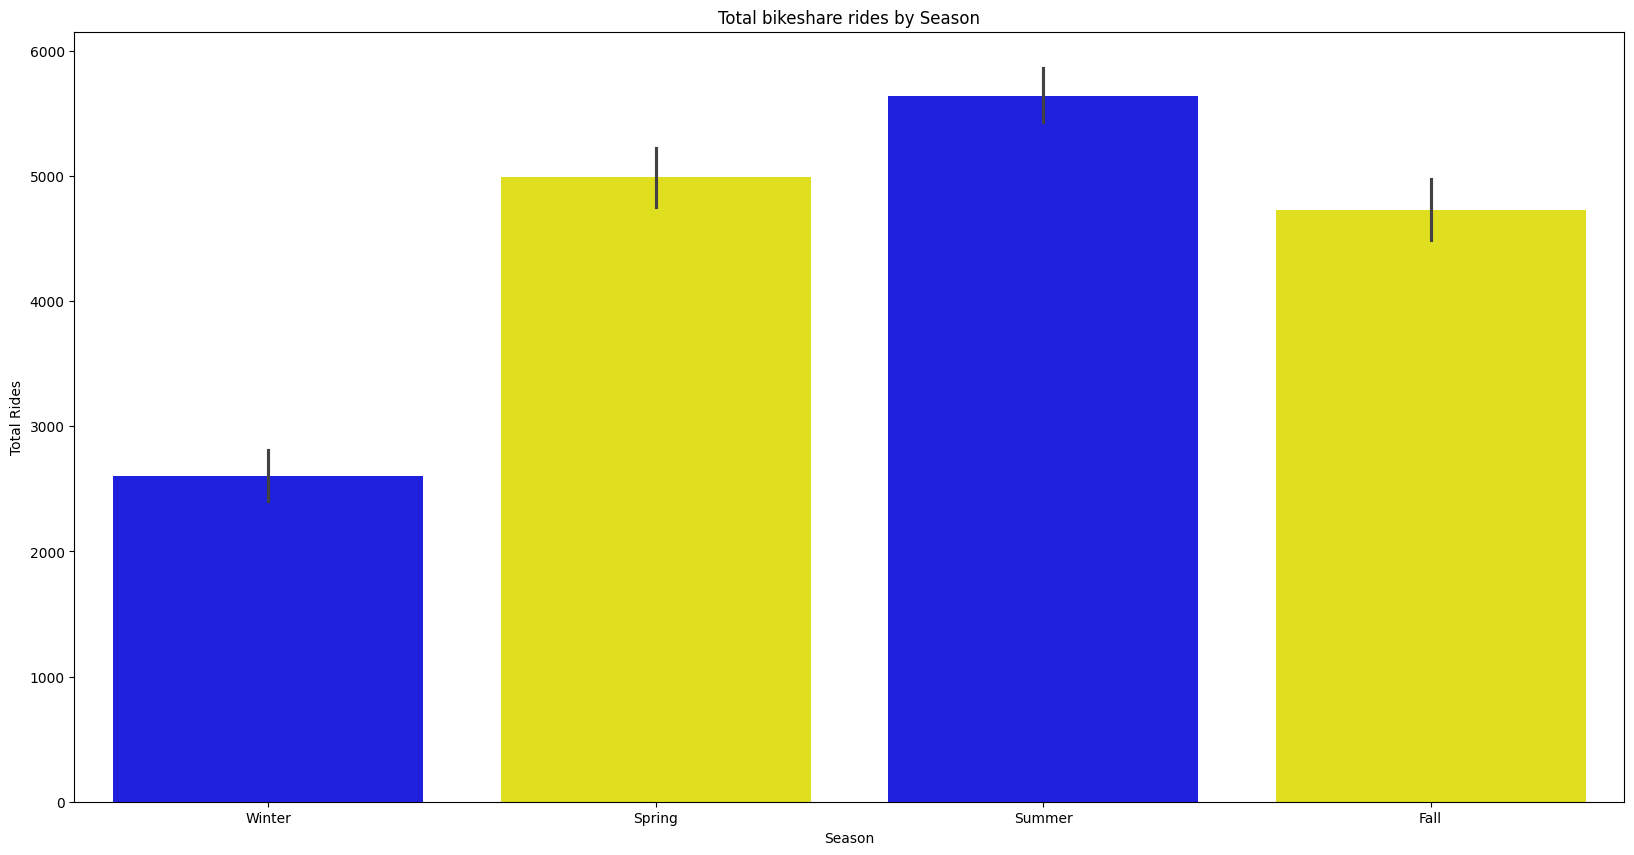

In [93]:
plt.figure(figsize=(20,10))

# Create a barplot
sns.barplot(
    x="season",
    y="total_count",
    data=df,
    palette=["blue", "yellow"]
)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by Season")

# Show the plot
plt.show()

<ipython-input-94-12c1a1999cc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-94-12c1a1999cc8>:4: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

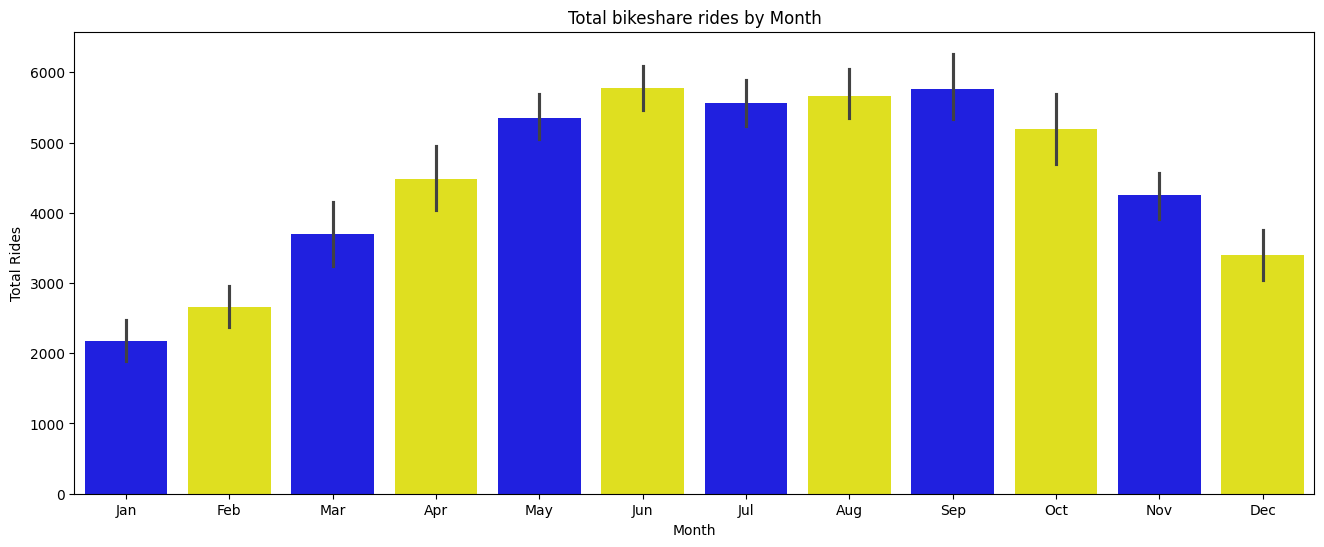

In [94]:
plt.figure(figsize=(16,6))

# Create a barplot
sns.barplot(
    x="month",
    y="total_count",
    data=df,
    palette=["blue", "yellow"]
)

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by Month")

# Show the plot
plt.show()

# Visualization & Explanatory Analysis


# Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

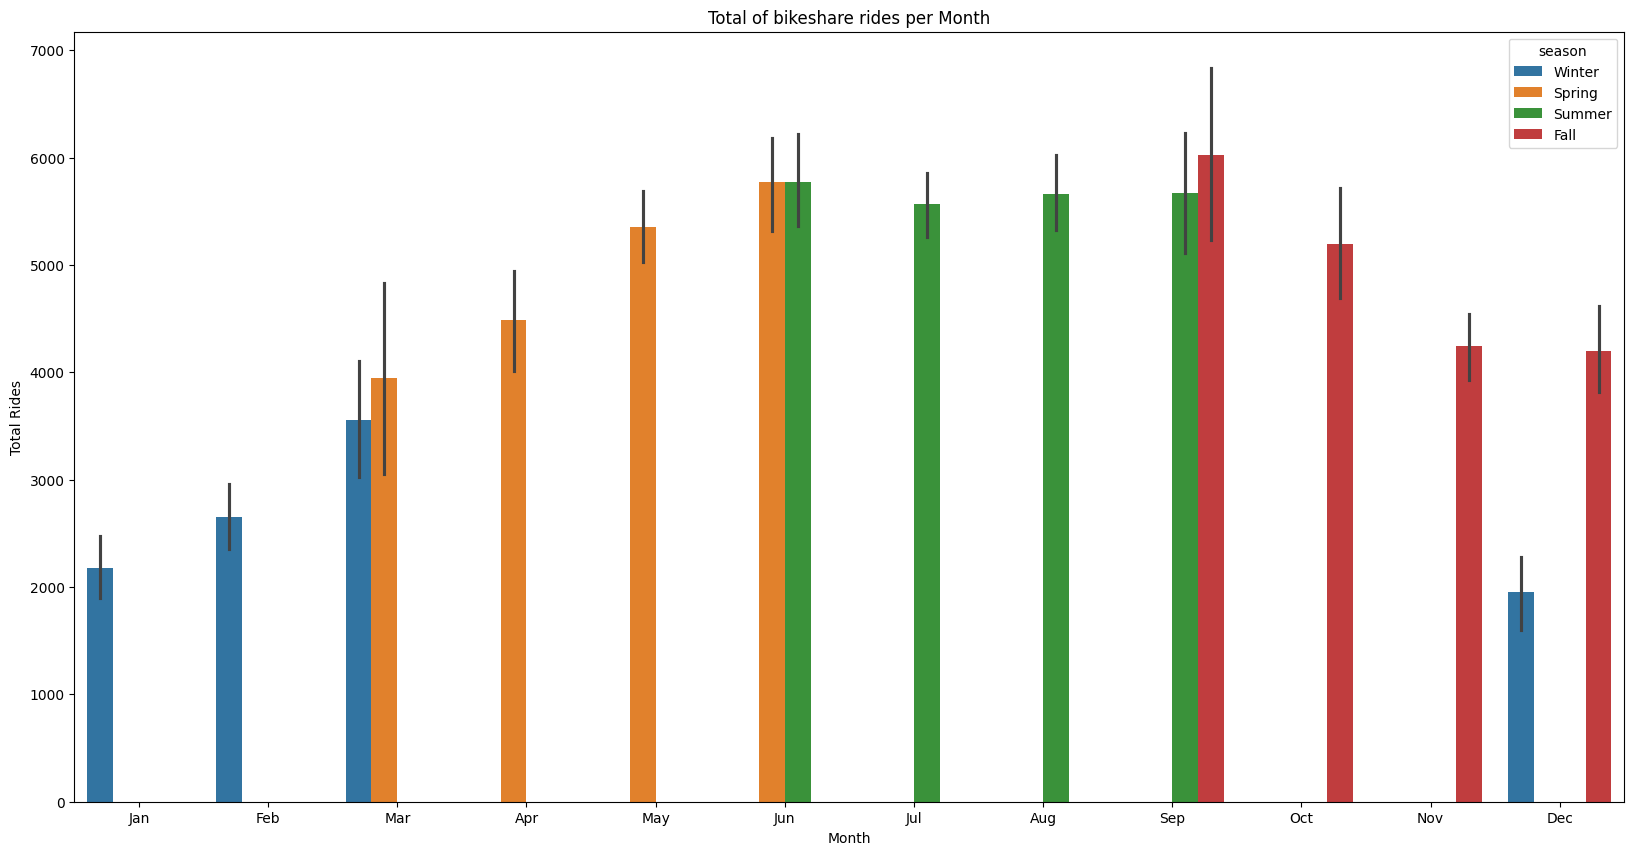

In [95]:
plt.figure(figsize=(20,10))

# Create a barplot
sns.barplot(x='month', y='total_count', data=df, hue='season')

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Month")

# Show plot
plt.show()

# Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


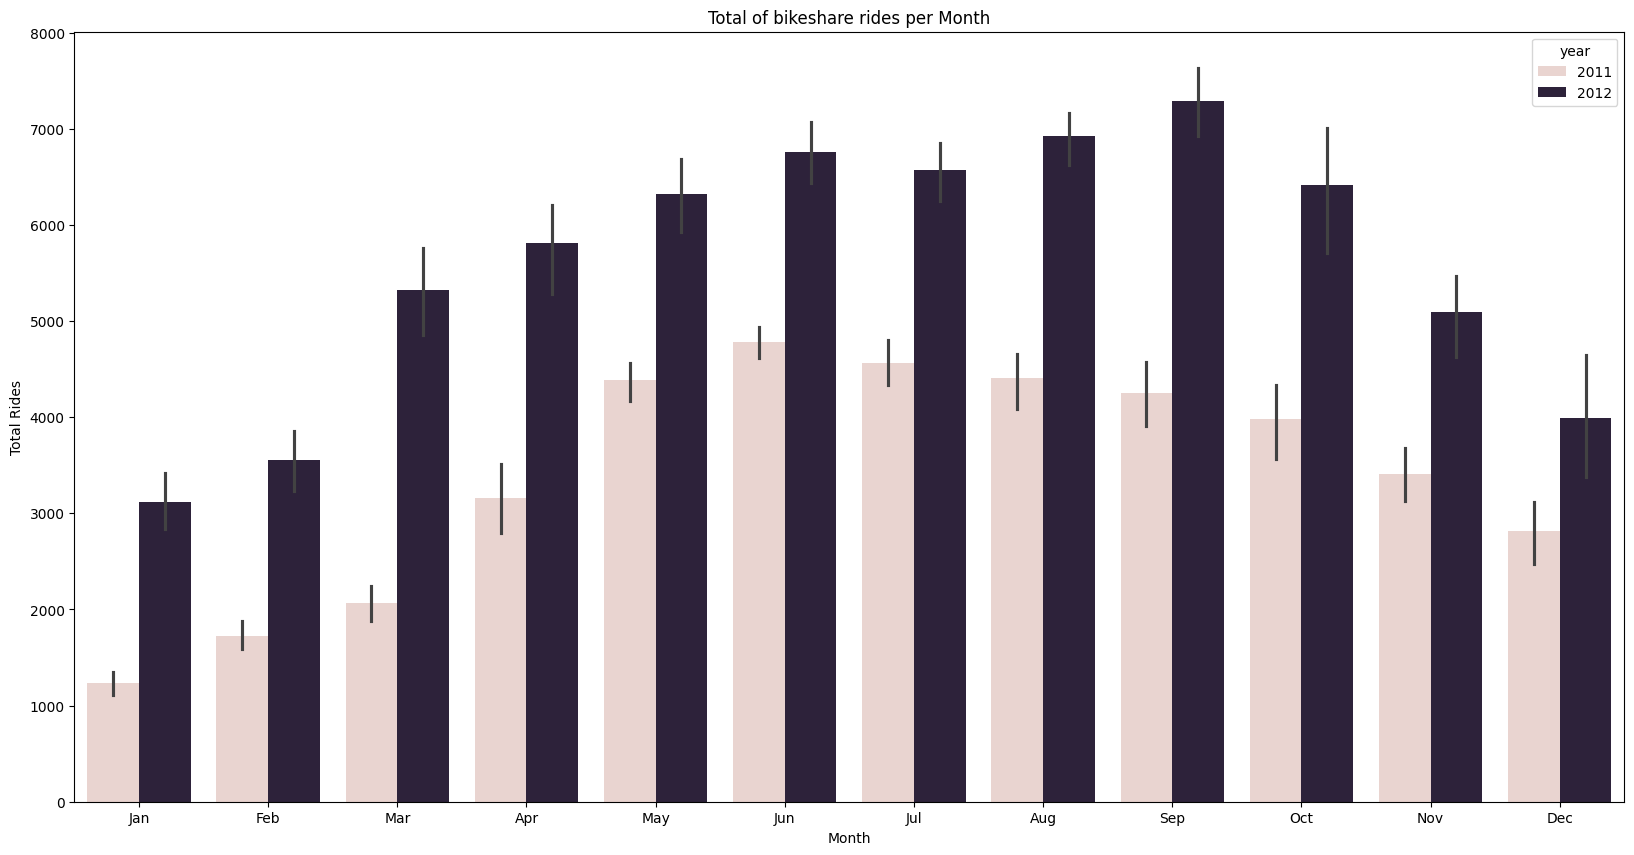

In [96]:
plt.figure(figsize=(20,10))

# Create a barplot
sns.barplot(x='month', y='total_count', data=df, hue='year')

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Month")

# Show plot
plt.show()

# Pertanyaan 3:

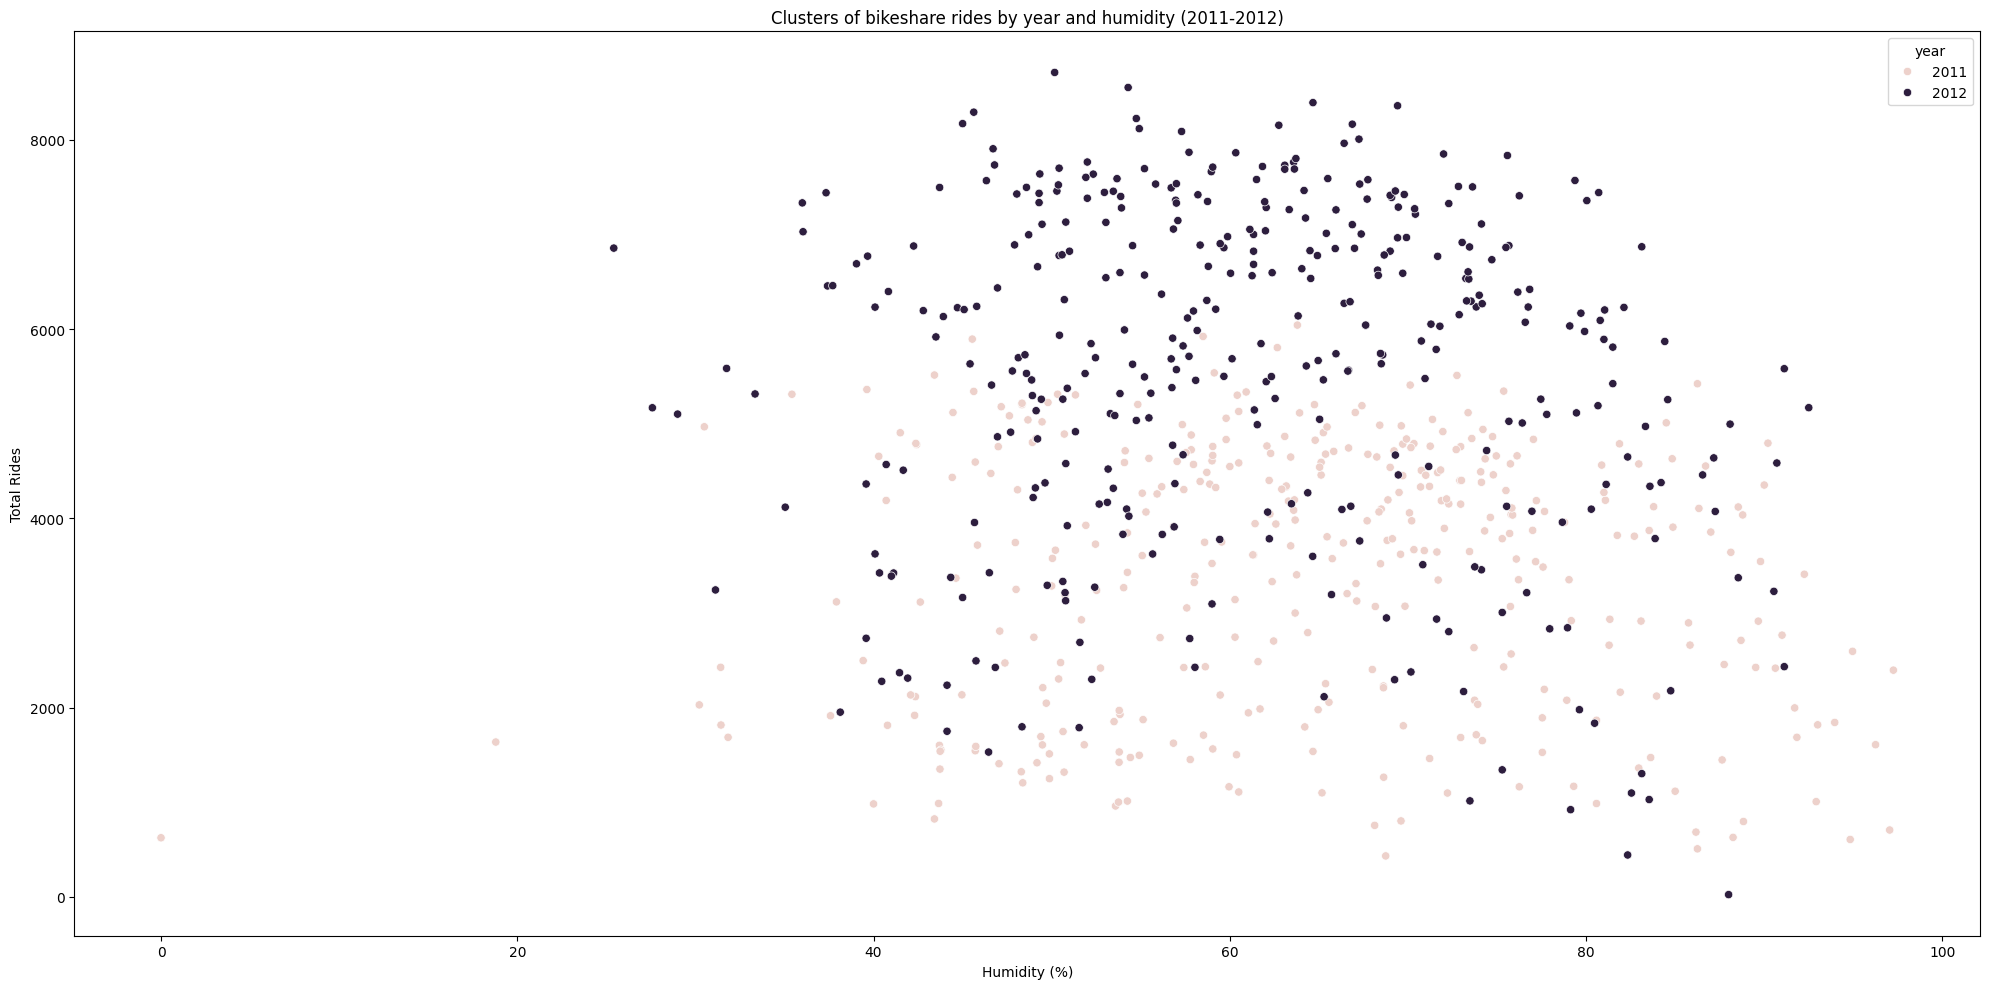

In [97]:
plt.figure(figsize=(20,10))

# Create a scatterplot
sns.scatterplot(x='humidity', y='total_count', data=df, hue='year')

# Add labels and a title to the plot
plt.xlabel("Humidity (%)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides by year and humidity (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

# Conclusion



*   Conclution Pertanyaan 1 : Pesanan bike riding mencapai puncaknya pada bulan September di musim gugur.
*   Conclution Pertanyaan 2 : Pada tahun 2011 dan 2012, pesanan bike riding tertinggi juga terjadi di bulan September.
*   Conclution Pertanyaan 3 : Permintaan untuk bike riding cenderung rendah pada kelembapan sekitar 20%, sementara permintaan cenderung tinggi pada kelembapan sekitar 50%.

